#**Data Exploration for ChrisCo**



###ChrisCo is a fictitious yet highly successful firm that manages several locations around the United Kingdom. ChrisCo gathers a great deal of information about individual customers who visit its venues via its loyalty card programme. However, this information has been aggregated/averaged to provide information about the company's 40 locations, each designated by a unique three-letter number.

---



### **1.   To use interaction plots, it is necessary to use holoviews and hvplot.**







In [14]:
!pip install holoviews hvplot

### **2.   To perform visualisation, several libraries needs to be imported.**



In [15]:
# Import `matplotlib` under the alias `plt`
import matplotlib.pyplot as plt

# Import `numpy` under the alias `np`
import numpy as np

# Import `seaborn` under the alias `sns`
import seaborn as sns

# Import `pandas` under the alias `pd`
import pandas as pd

# Import `holo views`
import holoviews as hv
import hvplot.pandas

# Listing the daily number of customer visits to the company's 40 venues
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueDailyVisitors.csv', index_col=0)
data.index = pd.to_datetime(data.index)

### **3.   Quick look on the data.**



In [16]:
print(data)
print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

            RDA  XJT  VRD  ZLH  ZPL  AWF  SPF  YXF  WFI  QJL  ...  QRY  SJU  \
Date                                                          ...             
2019-01-01  564   78   61   93   60  142  451   57   73  252  ...  275  587   
2019-01-02  705   82   64   60   79  109  519   67   91  273  ...  283  514   
2019-01-03  477   73   64   71   55  137  298   66   74  191  ...  195  468   
2019-01-04  467   76   59   46   51  111  363   79   63  150  ...  185  391   
2019-01-05  439   76   79   73   63  134  313  100   72  170  ...  187  380   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2019-12-27  458   68   57   51    0   88  310   86   99  107  ...  180  403   
2019-12-28  512   82   46   61    0  129  338   72   92  142  ...  221  375   
2019-12-29  435   75   75   70    0  178  390   88   84  264  ...  200  484   
2019-12-30  569   76   58   66    0  216  459   72   90  225  ...  274  545   
2019-12-31  584   68   71   56    0  226  535   73  

In [17]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

print(data.sum())
print(data.head())

RDA    188958
SJU    174951
SPF    165673
PXI    157952
PDT     90631
QRY     85625
QJL     82156
CWN     69391
BEY     62150
CQC     58059
DKS     57727
AWF     53648
WXV     35146
WDZ     32017
ZFX     31757
WFI     30656
XLA     29909
TLJ     29154
XPE     29019
TRV     28543
YXF     27894
WRL     27886
XJT     27558
UZO     26230
XFP     25701
ZLH     24502
YRU     23822
VRD     23362
VLS     23295
UFY     23023
AXM     22185
GLQ     20410
XXO     16736
ZJB     15799
BQV     14241
BKI     12684
ZPL     11282
YDI      8287
YVW      5279
AEQ      4441
dtype: int64
            RDA  SJU  SPF  PXI  PDT  QRY  QJL  CWN  BEY  CQC  ...  AXM  GLQ  \
Date                                                          ...             
2019-01-01  564  587  451  618  279  275  252  252  222  218  ...   65   57   
2019-01-02  705  514  519  467  277  283  273  195  205  172  ...   52   38   
2019-01-03  477  468  298  451  273  195  191  197  148  141  ...   48   77   
2019-01-04  467  391  363  334  

### **4.   The following line plot shows the periodic changes and trends between the High Volume Venues.**



            RDA  SJU  SPF  PXI
Date                          
2019-01-01  564  587  451  618
2019-01-02  705  514  519  467
2019-01-03  477  468  298  451
2019-01-04  467  391  363  334
2019-01-05  439  380  313  243


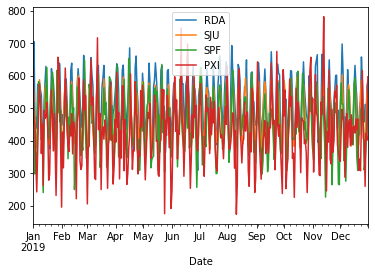

In [18]:
selected = ['RDA', 'SJU', 'SPF', 'PXI']

print(data[selected].head())

data[selected].plot.line()
plt.show()

### **5.   The following graph shows the 7-day Rolling Average for High Volume Venue Visits.**



It consists of four independent stores with a rolling average of client visits of seven days. Because we are working with vast amounts of data, we use a rolling average to minimise the build-up of different line plots of data and make the line plot more obvious. The y-axis indicates the number of visits, and the x-axis represents the time series in this line graph, which shows the frequency of client visits throughout that year. 

We can see that the Venue RDA, SJU, SPF and PXI are the high-volume venue visits with a 7-day rolling average. Venue RDA, SPF and PXI show fluctuations in customers over the year. However, Venue SJU remains constant with minimum customer fluctuations over the year. Overall, Venue RDA has the highest customer visits compared to other Venues.

            RDA  SJU  SPF  PXI
Date                          
2019-01-01  564  587  451  618
2019-01-02  705  514  519  467
2019-01-03  477  468  298  451
2019-01-04  467  391  363  334
2019-01-05  439  380  313  243


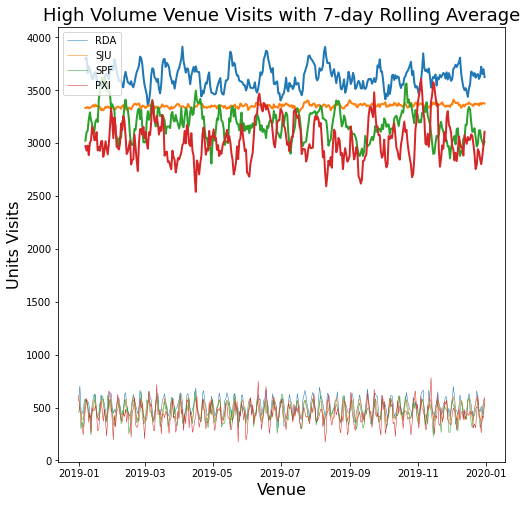

In [19]:
period = 7
rolling_average = data.rolling(window=period).sum()

selected = ['RDA', 'SJU', 'SPF', 'PXI']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
#plt.ylim(ymin=0)
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Units Visits', fontsize=16)
plt.title('High Volume Venue Visits with 7-day Rolling Average', fontsize=18)
plt.legend(selected, loc=2)
plt.show()

In [20]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

print(data.sum())
print(data.head(15))

RDA    188958
SJU    174951
SPF    165673
PXI    157952
PDT     90631
QRY     85625
QJL     82156
CWN     69391
BEY     62150
CQC     58059
DKS     57727
AWF     53648
WXV     35146
WDZ     32017
ZFX     31757
WFI     30656
XLA     29909
TLJ     29154
XPE     29019
TRV     28543
YXF     27894
WRL     27886
XJT     27558
UZO     26230
XFP     25701
ZLH     24502
YRU     23822
VRD     23362
VLS     23295
UFY     23023
AXM     22185
GLQ     20410
XXO     16736
ZJB     15799
BQV     14241
BKI     12684
ZPL     11282
YDI      8287
YVW      5279
AEQ      4441
dtype: int64
            RDA  SJU  SPF  PXI  PDT  QRY  QJL  CWN  BEY  CQC  ...  AXM  GLQ  \
Date                                                          ...             
2019-01-01  564  587  451  618  279  275  252  252  222  218  ...   65   57   
2019-01-02  705  514  519  467  277  283  273  195  205  172  ...   52   38   
2019-01-03  477  468  298  451  273  195  191  197  148  141  ...   48   77   
2019-01-04  467  391  363  334  

### **6.   The following graph shows the bar chart of High, Medium and Low Volume Venue Visits.**



A bar chart better represents the overall value of a variable. When working with significant amounts of data, this is incredibly handy. It quickly exposes the weight of several variables, allowing us to choose which variable is the most important by simply examining the bars. High-volume venue visits, medium-volume, and low volume venue visits are shown in the figure.

We can see that RDA, SJU, SPF, and PXI are the four high-volume venues. These locations are within walking distance of one another and have had over 150,000 visitors. There are eight visits to venues with a medium volume. Close bars are present in the letters 'PDT', 'QRY', and 'QJL'. In contrast, close bars are present in the letters 'CWN', 'BEY', 'CQC', 'DKS', and 'AWF.' The lowest volume venue visit has three bar segments, with the final seven 'ZJB', 'BQV', 'BKI', 'ZPL', 'YDI', 'YVW', and 'AEQ' venues being new venues that debuted this year.


High: ['RDA', 'SJU', 'SPF', 'PXI']
Medium: ['PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']
Low: ['WXV', 'WDZ', 'ZFX', 'WFI', 'XLA', 'TLJ', 'XPE', 'TRV', 'YXF', 'WRL', 'XJT', 'UZO', 'XFP', 'ZLH', 'YRU', 'VRD', 'VLS', 'UFY', 'AXM', 'GLQ', 'XXO', 'ZJB', 'BQV', 'BKI', 'ZPL', 'YDI', 'YVW', 'AEQ']


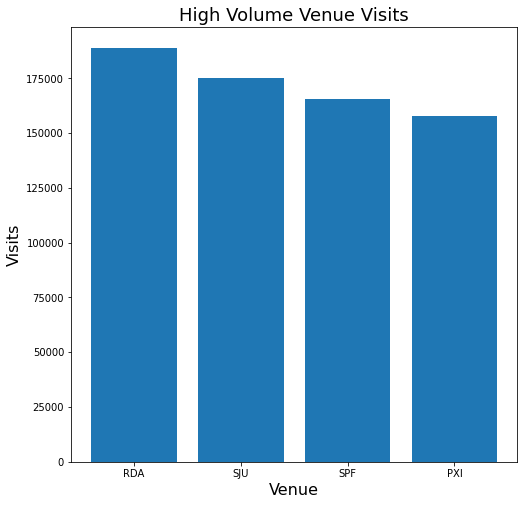

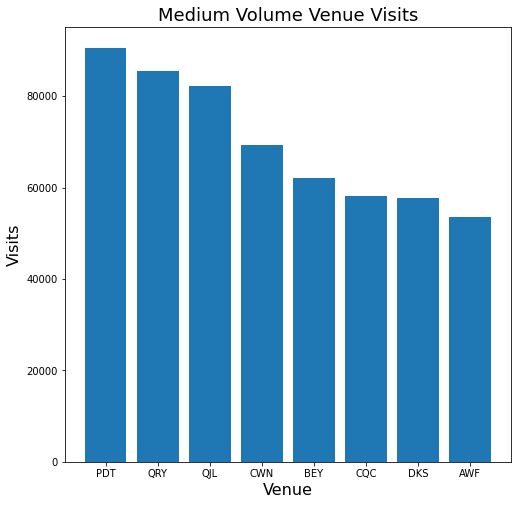

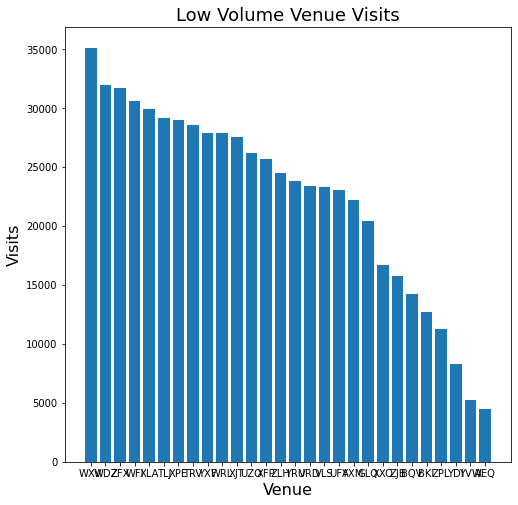

In [21]:
categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_Hits = data[name].sum()
    if total_Hits > 150000:
        category = 0
    elif total_Hits > 50000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)
    #print('Pages ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Venue', fontsize=16)
    plt.ylabel('Visits', fontsize=16)
    plt.title(categories[i] + ' Volume Venue Visits', fontsize=18)
    plt.show()

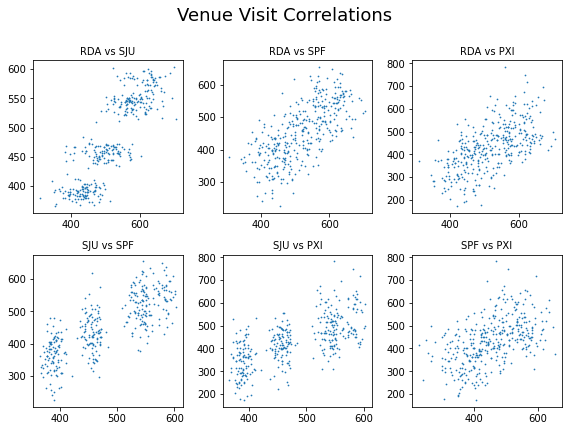

In [22]:
selected = ['RDA', 'SJU', 'SPF', 'PXI']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Venue Visit Correlations', fontsize=18, y = 1.05)
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(3, 3, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=0.5)
        counter += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

            RDA  SJU  SPF  PXI
Date                          
2019-01-01  564  587  451  618
2019-01-02  705  514  519  467
2019-01-03  477  468  298  451
2019-01-04  467  391  363  334
2019-01-05  439  380  313  243


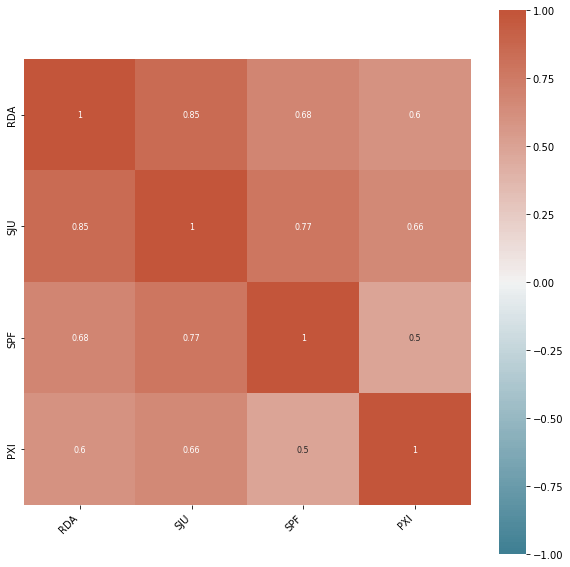

In [ ]:
selected = ['RDA', 'SJU', 'SPF', 'PXI']
selected = data.columns[data.sum() > 150000]

print(data[selected].head())

plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### **7.   The following chart shows the scatter plot of Venue Visits Correlation between High and Medium Venue.**



Finding the correlation between two variables is the goal of a scatter plot. It allows us to see how closely two thoughts are connected or what influence one has on the other. But, more importantly, if we can forecast the link between these two factors, we will be in an excellent position to look forward and predict future behaviour. This figure shows a scatter plot of the correlation of different venue visits.

We can see the correlation between high and medium venue visits. The closer the dots on a line, the stronger the correlation, whether positive or negative. However, it does not give a perfect view of the correlation. There is a strong positive correlation between 'RDA', 'SJU', 'PDT', 'QRY', 'CWN', 'BEY', 'CQC', and 'DKS'.


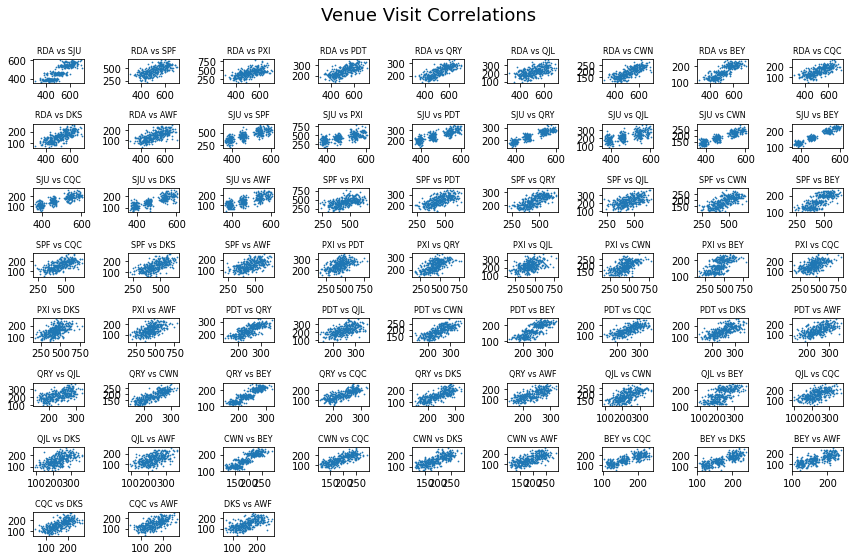

In [23]:
selected = ['RDA', 'SJU', 'SPF', 'PXI', 'PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']

counter = 1
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Venue Visit Correlations', fontsize=18, y = 1.05)
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(9, 9, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=8)
        sub.scatter(data[name_i], data[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.6, hspace=1.5)
plt.tight_layout()
plt.show()

### **8.   The following figure shows the heatmap of Correlation between High and Medium Volume Venues.**



Heatmaps enable data analysis considerably faster and easier than studying data recorded in excel with infinite rows and columns by providing a visual depiction of numerical data in a ready-to-consume format. Overarching comparisons that would otherwise need data analysis and sorting days perform with a single glance at the resulting heatmap. The figure shows the heatmap of correlation between high volume and medium volume venues.

Heatmaps provide a more accurate picture of variable relationships, unlike scattering plot graphs. Using a heatmap, we can observe more correlations and the strength of correlation between variables, which we could not notice using a scatter plot. The venues DKS and AWF, CQC and DKS, BEY and CQC, QWN and BEY, and others are substantially positive connected in the chart above. As a result, we will only create a new scatter plot to indicate positive correlations with a Pearson coefficient more significant than 0.8.


            RDA  SJU  SPF  PXI  PDT  QRY  QJL  CWN  BEY  CQC  DKS  AWF
Date                                                                  
2019-01-01  564  587  451  618  279  275  252  252  222  218  201  142
2019-01-02  705  514  519  467  277  283  273  195  205  172  166  109
2019-01-03  477  468  298  451  273  195  191  197  148  141  144  137
2019-01-04  467  391  363  334  185  185  150  163  122   70  105  111
2019-01-05  439  380  313  243  196  187  170  120  121  127  126  134


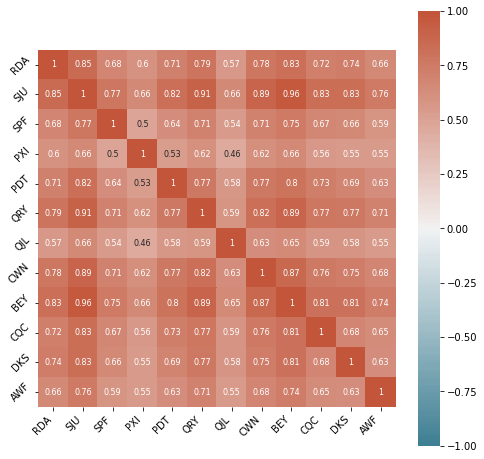

In [24]:
selected = ['RDA', 'SJU', 'SPF', 'PXI'] + ['PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']
selected = data.columns[data.sum() > 50000]

print(data[selected].head())

plt.figure(figsize=(8, 8))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### **9.   The following figure shows the Pearson Coefficient scatter plot of Positive Correlation Venues.**



Finding the correlation between two variables is the goal of a scatter plot. It allows us to see how closely two thoughts are connected or what influence one has on the other. But, more importantly, if we can forecast the link between these two factors, we will be in an excellent position to look forward and predict future behaviour. The figure shows a scatter plot of the correlation of different venue visits.

The figure illustrates a positive connection with a Pearson Coefficient greater than 0.8. The scatter plot includes the following venues: RDA, SJU, PDT, QRY, CWN, BEY, CQC, and DKS. RDA and QRY, as well as PDT and CWN, have a good relationship. On the other hand, other venues do not seem to have a significant association.


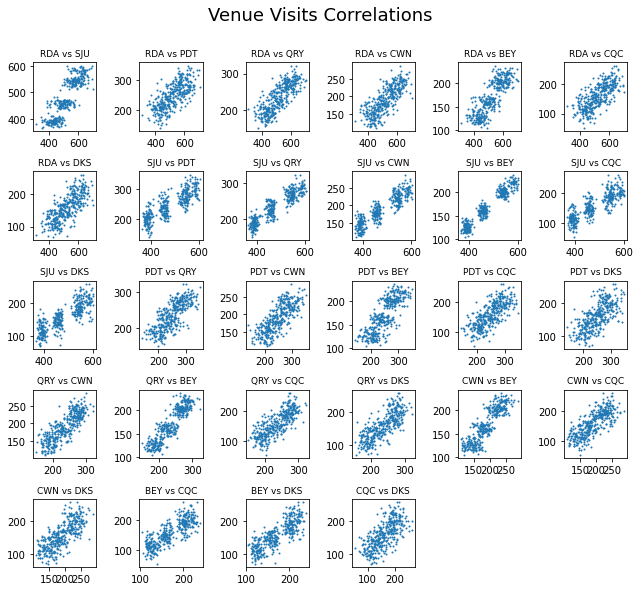

In [25]:
selected = ['RDA', 'SJU', 'PDT', 'QRY', 'CWN', 'BEY', 'CQC', 'DKS']

counter = 1
fig = plt.figure(figsize=(9, 9))
fig.suptitle('Venue Visits Correlations', fontsize=18, y = 1.05)
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(6, 6, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=9)
        sub.scatter(data[name_i], data[name_j], s=1)
        counter += 1
plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.tight_layout()
plt.show()

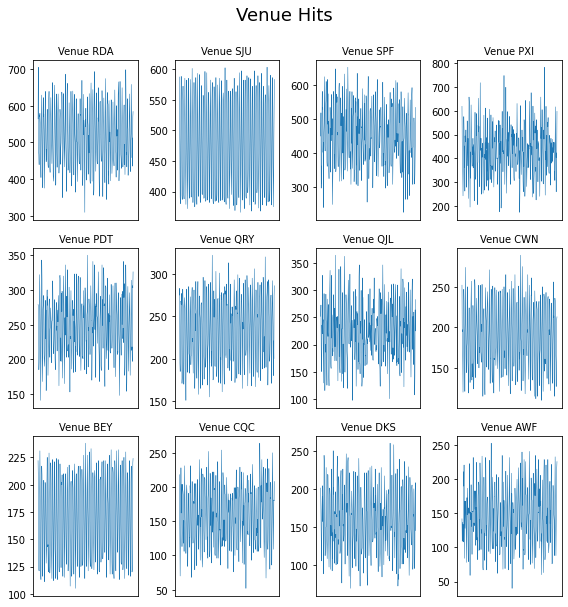

In [26]:
selected = ['RDA', 'SJU', 'SPF', 'PXI'] + ['PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']
counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Venue Hits', fontsize=18, y=1.05)
for name in selected:
    sub = fig.add_subplot(3, 4, counter)
    sub.set_title('Venue ' + name, fontsize=10)
    sub.plot(data.index, data[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

### **10.   The following figure shows the seasonality graph of High and Medium Volume Venue Visits.**



Seasonality refers to the recurrence of data throughout time. Another critical feature of time series analysis is its ability to detect patterns in data. After eliminating the trend from the data, it is usually quantified by autocorrelation. The graph of weekly seasonality of high and medium volume venue visits is shown in this figure.

The spikes that rise over the dashed lines are the subject of this illustration. Autocorrelation is evidenced when such tips are statistically significant. Notably, eight of the twelve locations have a weekly distribution, with a peak every seven days. Weekends and holidays, for example, might contribute to such seasonality. Furthermore, this implies that the venue's visitor figures are linked. To explain further, when the number of visitors increases, so do the lines on the graphs, and vice versa.


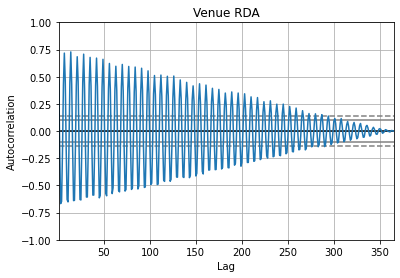

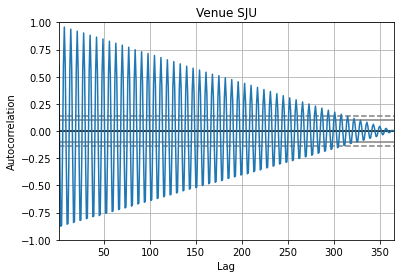

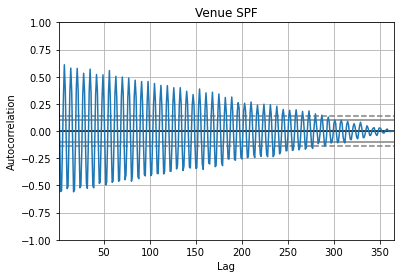

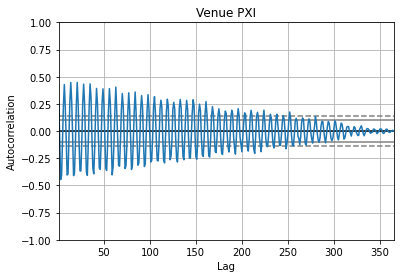

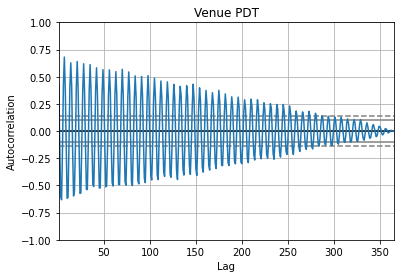

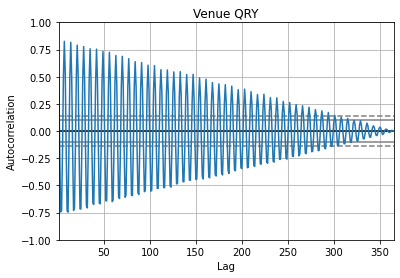

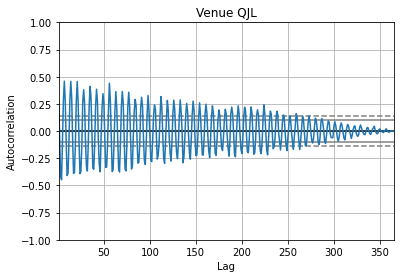

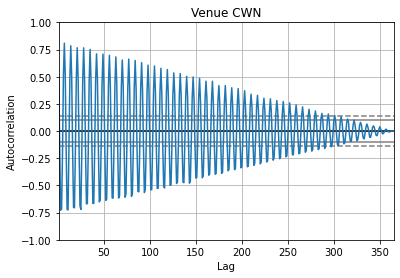

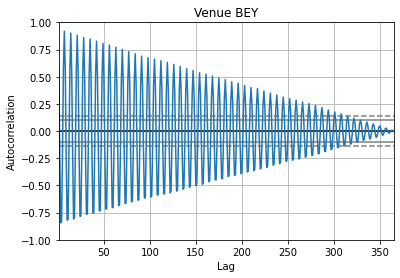

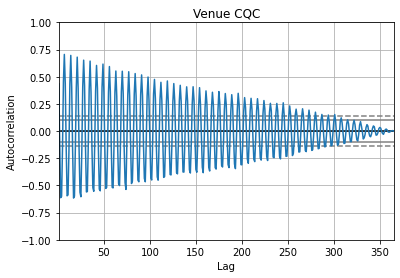

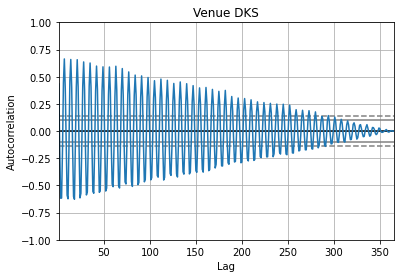

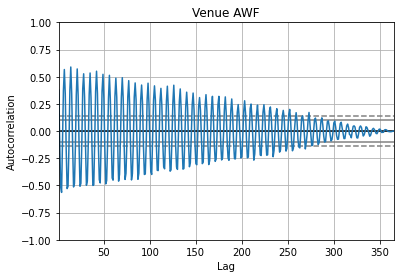

In [28]:
selected = ['RDA', 'SJU', 'SPF', 'PXI'] + ['PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']

for name in selected:
    pd.plotting.autocorrelation_plot(data[name])
    plt.title('Venue ' + name)
    plt.show()

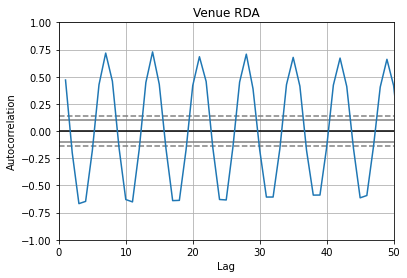

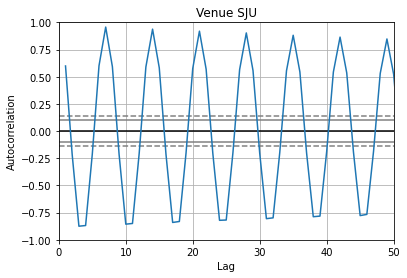

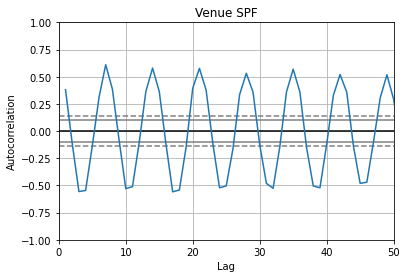

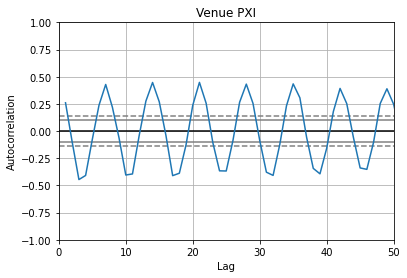

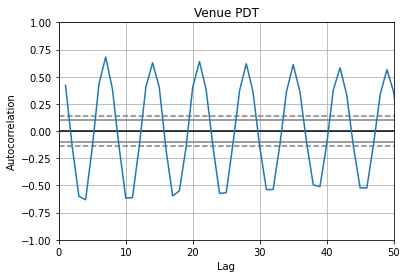

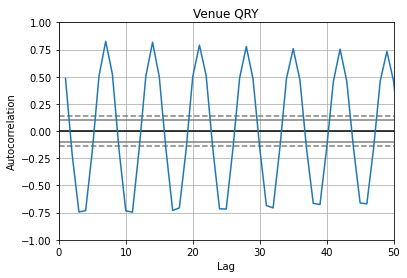

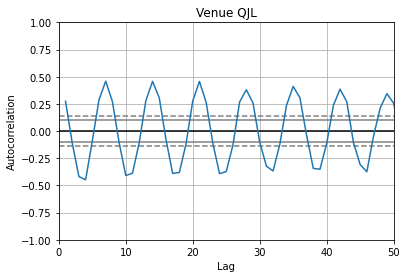

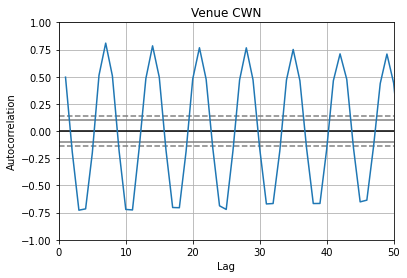

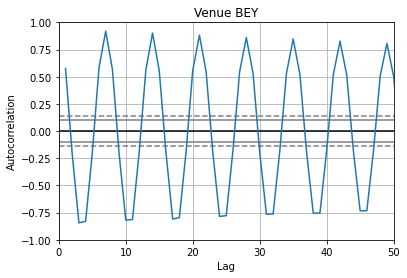

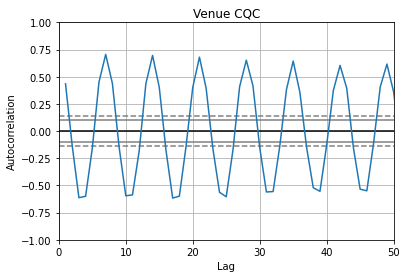

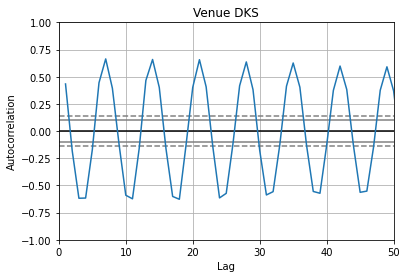

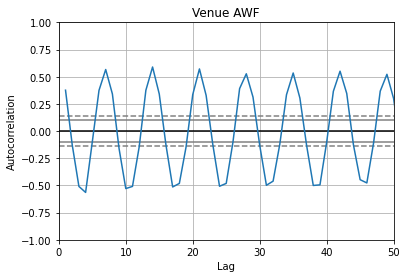

In [29]:
selected = ['RDA', 'SJU', 'SPF', 'PXI'] + ['PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']

for name in selected:
    pd.plotting.autocorrelation_plot(data[name])
    plt.xlim([0, 50])
    plt.title('Venue ' + name)
    plt.show()

### **11.   Here I am compiling the data into two dataframes: one containing daily visitor data (one row for each date); the other containing summary data (one row for each venue).**


In [30]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueDailyVisitors.csv',index_col=0)

VenueAge = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueAge.csv', index_col=0)
VenueDistance = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueDistance.csv', index_col=0)
VenueDuration = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueDuration.csv', index_col=0)
VenueGender = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueGender.csv', index_col=0)
VenueSpend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188274/VenueSpend.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['VenueAge'] = VenueAge.values
summary_data['VenueDistance'] = VenueDistance.values
summary_data['VenueDailyVisitors'] = data.sum().values
summary_data['VenueDuration'] = VenueDuration.values
summary_data['VenueGender'] = VenueGender.values
summary_data['VenueSpend'] = VenueSpend.values

print(summary_data.head())
print(summary_data.describe())

     VenueAge  VenueDistance  VenueDailyVisitors  VenueDuration  VenueGender  \
RDA        38             76              188958            114           55   
XJT        55              4               27558            134           58   
VRD        34              5               23362             91           58   
ZLH        36              5               24502             84           45   
ZPL        33              2               11282            124           51   

     VenueSpend  
RDA          25  
XJT          35  
VRD          26  
ZLH          28  
ZPL          17  
        VenueAge  VenueDistance  VenueDailyVisitors  VenueDuration  \
count  40.000000      40.000000           40.000000      40.000000   
mean   37.475000      13.450000        46943.475000     102.700000   
std    10.614425      15.987094        47291.170902      19.520141   
min    23.000000       1.000000         4441.000000      65.000000   
25%    28.000000       4.750000        22813.500000      87.0

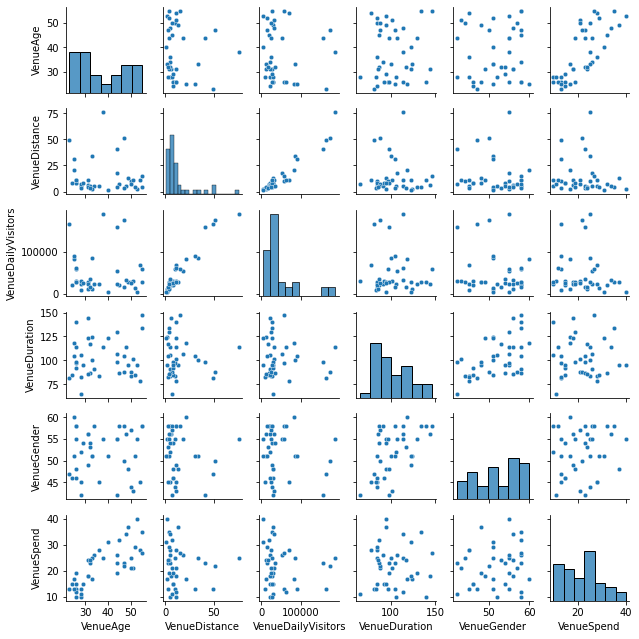

In [31]:
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

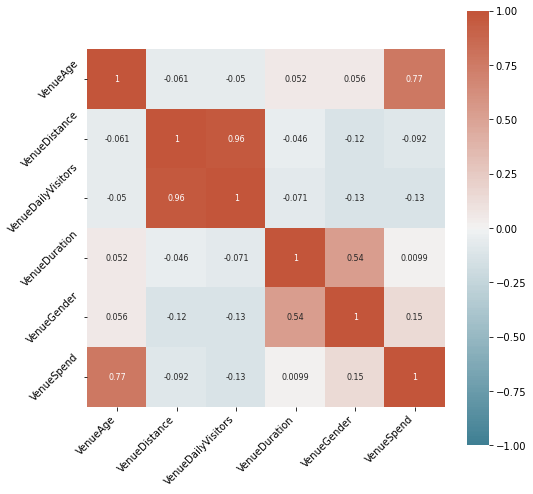

In [32]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### **12.   The following figure shows the Interactive line plot of High-Volume Venue.**



The figure represents the interactive line plot visualisation of a high-volume venue. When users choose points or series in a chart, this enables us to create simple-looking visualisations that are rather detailed and a tool for users to explore our data to their heart's content. We may zoom in on a particularly intriguing variation and rapidly add more variables to describe the pattern we've discovered using interactive data visualisation. Furthermore, interactive visualisation will aid us in identifying findings that are not consistent with the theory.

Panning, box zoom, wheel zoom, save, reset, and hover are among the interactive capabilities shown in this figure. As seen in the graph, RDA has the most outstanding total score among the four locations. PXI, on the other hand, gets the most significant number of visits on certain days. The hover is used to determine which day it is. This indicates that PXI increased to 782 on November 13th, 2019. Even though PXI is the lowest, there was a day when it fell below its average. Use the hover to see which day it is. PXI plummeted to 174 on August 10th, 2019.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
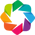

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [33]:
selected = ['RDA', 'SJU', 'SPF', 'PXI']

plot = data[selected].hvplot.line(
    frame_height=400, frame_width=400,
    xlabel='Date', ylabel='Visits',
    title='High Volume Venue'
)
hv.extension('bokeh')
plot

### **13.   The following figure shows the Interactive heatmap of All Venue Visits.**



The figure represents the interactive heatmap visualisation of all venue visits. When users choose points or series in a chart, this enables us to create simple-looking visualisations that are rather detailed and a tool for users to explore our data to their heart's content. We may zoom in on a particularly intriguing variation and rapidly add more variables to describe the pattern we've discovered using interactive data visualisation. Furthermore, interactive visualisation will aid us in identifying findings that are not consistent with the theory.

Panning, box zoom, wheel zoom, save, reset, and hover are among the interactive capabilities shown in this figure. Use the box zoom and approach to view the most robust correlations and values. This indicates a strong correlation between QRY vs SJU with a value of 0.9. There is also a strong correlation between BEY vs PDT, with a value of 0.79. Use the reset to return to its normal state.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
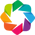

:HeatMap   [columns,index]   (value)

In [34]:
plot = data.corr().hvplot.heatmap(
    frame_height=400, frame_width=400,
    title='Venue Correlations',
    rot=90, cmap='coolwarm' 
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot

### **14.   Conclusion**



In the end, the business concentrates on high and medium volume venues. Thus, this study presents significant findings and trends in those venues. The last seven 'ZJB', 'BQV', 'BKI', 'ZPL', 'YDI', 'YVW', and 'AEQ' venues are new venues that opened this year, with the lowest volume of venue visits having three-bar segments. There were no negative relationships between the characteristics provided. RDA has the highest median out of all four when it comes to high-volume venues. Furthermore, eight of the twelve exhibits weekly seasonality.